# Digital trace data – Lab 4: Errors and designed big data

In this lab, we will work with a study in which members from the LISS panel were invited to donate data from their WhatsApp account as well as data from one WhatsApp group chat.

In this lab, we will learn more about the LISS panel, explore both the representation and measurement errors present in this dataset, and learn how to apply ‘amplified asking’ approaches on this dataset that combines survey and big data sources.  

## Part 1: The LISS Data

In in this lab, we will work with data from the LISS panel. The LISS panel is a representative sample in the Netherlands, managed by Centerdata at Tilburg University. It consists of 5,000 households and approximately 7,500 individuals aged 16 and older, recruited through a probability sample from the population register by Statistics Netherlands. You can visit their [website](https://statements.centerdata.nl/liss-panel-data-statement) and explore the various aspects of the panel. This information will be needed to answer the following questions.



### 1.1 What distinguishes the LISS Panel from other online panels according to the website?

*Add you answer here*

### 1.2 What are the potential advantages and disadvantages of the participation method used by the LISS panel compared to self-registration methods used by other panels?

*Add you answer here*

### 1.3 What is the focus of the LISS Core Study, and how often is it conducted?


*Add you answer here*

## Part 2: Loading the data

We will work with a combined dataset that comes from a study conducted in the LISS panel in 2023. Here, members of the LISS panel filled in a questionnaire. Next, they were invited to donate parts of their WhatsApp account data as well as data from one WhatsApp group chat.  

### 2.1. Before you can work with the LISS data, you need to fill in [this form](https://liss.statements.centerdata.nl/). Read the form carefully before signing. What do you think is the reason why everyone who uses data from the LISS panel needs to fill in this form?

*Add you answer here*

In [2]:
# Reading in the data
import pandas as pd

url = "https://raw.githubusercontent.com/digitalTraceData/digitalTraceData.github.io/refs/heads/main/materials/lab4/data_lab4.csv"
data = pd.read_csv(url)


### Codebook

The dataset contains the following variables:

1. **consent**: Willingness to share data (Yes/No)
2. **did_donate_account**: Was data actually donated (Yes/No)
3. **sex**: Respondent's sex (Male, Female, Other)
4. **age**: Respondent's age
5. **education**: Respondent's education level
   - primary education (Primary Education)
   - vmbo (Preparatory Secondary Vocational Education)
   - mbo (Secondary Vocational Education)
   - havo/vwo (Senior General Secondary Education/Pre-University Education)
   - hbo (University of Applied Sciences)
   - wo (University Education)
6. **groups_don**: Number of WhatsApp groups retrieved from donated data
7. **groups_quest**: Number of WhatsApp groups stated in the survey

In addition, the dataset contains all individuals who opened and started with filling in the questionnaire.

## Part 3: Representation issues

We now explore what representation issues might be present in this dataset. We follow the Total Survey Error Framework by Groves et al. (2009), and dive into some more specific issues related to data donation when relevant.

### Coverage error

We start on the top of the representation side of the TE framework with “Coverage error”.

#### 3.1. What is Coverage error?

*Add you answer here*

Since the dataset we have here does not contain any information about the target population, we cannot draw any conclusions about coverage error. However, we can use information from the LISS panel to get a better understanding of how they select their participants.

#### 3.2. How does the LISS panel select their participants?

*Add you answer here*

#### 3.3. What type of coverage error can you expect in the LISS panel because of this selection approach?

*Add you answer here*

### Sampling error

#### 3.4. What is sampling error?

*Add you answer here*

#### 3.5. Why can’t we investigate sampling error using this dataset? Is this a problem?

*Add you answer here*

### Nonresponse error

Now we get to the interesting part, nonresponse error. Within the dataset, we can see that we have different levels of nonresponse for different elements within the dataset. We will dive into these differences in more detail.

For this study, 4800 people were invited.

#### 3.6. For how many people was at least a response to one question in this study recorded? To see how many rows this dataset contains, we can use the shape function to see the dimensions of the dataset.

In [3]:
print(data.shape)

(3598, 7)


*Add you answer here*

#### 3.7. What is the percentage of the nonresponse here?

In [4]:
print((1-(len(data) / 4800)) * 100)

25.04166666666666


*Add you answer here*

Now that we are investigating our set with respondents, we can investigate how representative this set is with respect to the target population on various background characteristics. We consider sex, age and level of education, and we can compare the observed sample with statistics we can find on the CBS website.

#### 3.8. Compare the distribution of Sex in the dataset with the Dutch population. Do they differ? In what way?

We now explore how the distrubtion of "Sex" looks like in the sample.

In [6]:
print(data["sex"].value_counts())

sex
female    1878
male      1716
other        4
Name: count, dtype: int64


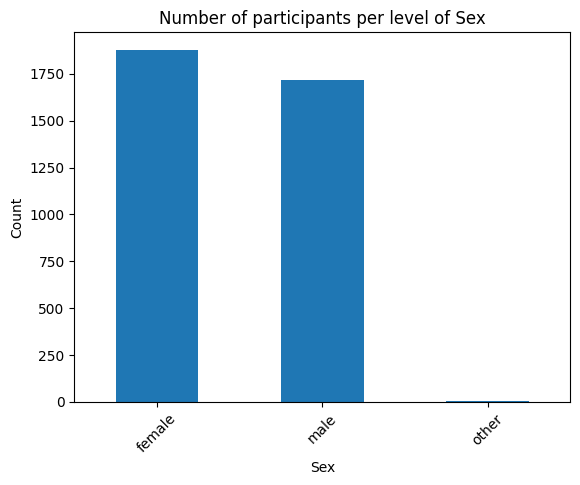

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# get sex counts
sex_counts = data["sex"].value_counts()

# Create Bar Plot
sex_counts.plot(kind="bar")
plt.title("Number of participants per level of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

*Add you answer here*

#### 3.9. Compare the distribution of Age in the dataset with the Dutch population. Do they differ? In what way?

We now explore how the distrubtion of "Age" differs between the group of people who donated their WhatsApp data and the group who did not. We do this by first creating a density plot.

/tmp/ipython-input-10-1345681806.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


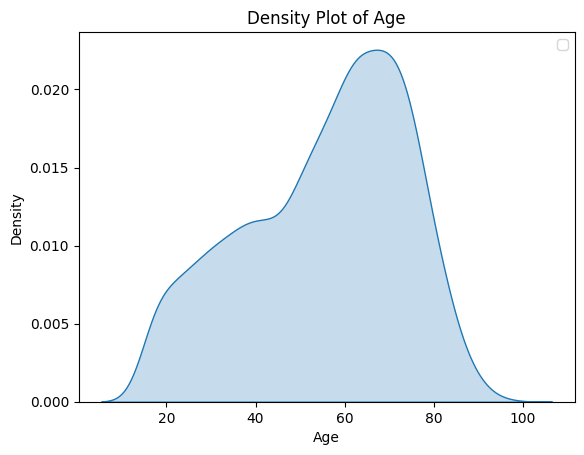

In [10]:
# Density plot for age
sns.kdeplot(data["age"], fill=True)

# Add titles and labels
plt.title("Density Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

*Add you answer here*

#### 3.10. Compare the distribution of "Education" in the dataset with the Dutch population. Do they differ? In what way?

We now explore how the distrubtion of "Education" looks like in the sample. We do this by first creating a histogram.

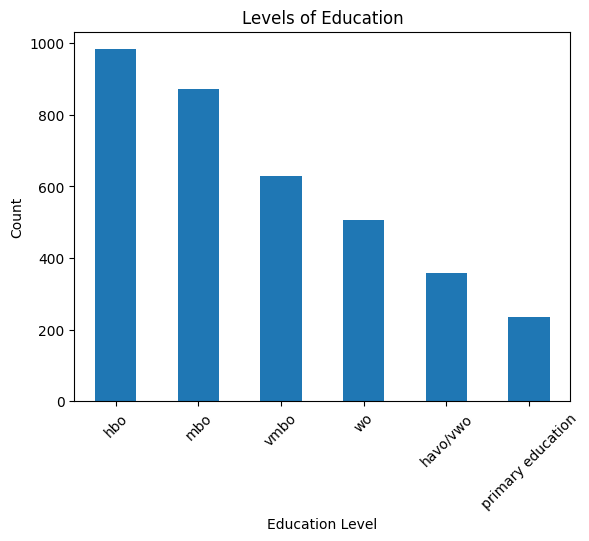

In [11]:
# get education counts for individuals who did vs. did not donate
education_counts = data["education"].value_counts()

# Create Bar Plots for both
education_counts.plot(kind="bar")
plt.title("Levels of Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

*Add you answer here*

We now go back into the issue of nonresponse itself. If we dive into this dataset in more detail, we quickly see that the nonresponse is higher in specific parts of the data, especially the donated data.

#### 3.11. How many people donated their WhatsApp account data?

In [21]:
print(data["did_donate_account"].value_counts())

did_donate_account
No     3249
Yes     349
Name: count, dtype: int64


*Add you answer here*

#### 3.12. What is the response percentage for the donation part of the observed sample?

In [22]:
print(data["did_donate_account"].value_counts()["Yes"] / len(data) * 100)

9.699833240689273


*Add you answer here*

There is more information available in this dataset to help us understand the mechanisms behind the nonresponse for this data donation part specifically. Before people started the data donation process, they were asked if they were willing to participate in the data donation part of the study.

#### 3.13. What can be reasons why people are not willing to donate their WhatsApp data?

*Add you answer here*


#### 3.14. How many people were willing to donate their WhatsApp data?

In [ ]:
print(data["consent"].value_counts())

no     2669
yes     929
Name: consent, dtype: int64


*Add you answer here*

#### 3.15. How man people indicated that they were willing to donate their WhatsApp data but did not donate in the end?

In [ ]:
print(pd.crosstab(data["consent"], data["did_donate_account"]))

did_donate_account    No  Yes
consent                      
no                  2669    0
yes                  580  349


*Add you answer here*

#### 3.16. What can be reasons by these people did not donate their data in the end?

*Add you answer here*


We now investigate how the group of people who donated their WhatsApp data potentially differ from the group who did not donate their data with respect to the background characteristics we investigated earlier: sex, age and level of education.

#### 3.17. Is the distribution of Sex similar between the group that donated their WhatsApp data and the group who did not donate? Of not, in what way are they different?

In [ ]:
print(pd.crosstab(data["sex"], data["did_donate_account"]))

did_donate_account    No  Yes
sex                          
female              1702  176
male                1544  172
other                  3    1


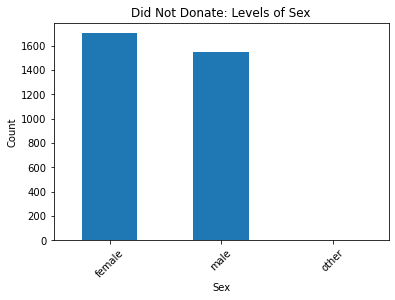

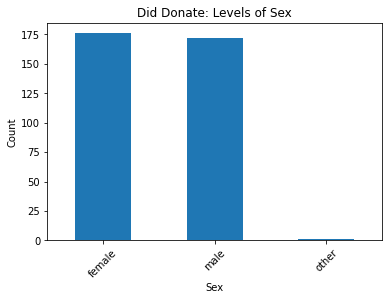

In [ ]:
# get sex counts for individuals who did vs. did not donate
sex_counts_nodon = data["sex"][data["did_donate_account"] == "No"].value_counts()
sex_counts_don = data["sex"][data["did_donate_account"] == "Yes"].value_counts()

# Create Bar Plots
sex_counts_nodon.plot(kind="bar")
plt.title("Did Not Donate: Levels of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

sex_counts_don.plot(kind="bar")
plt.title("Did Donate: Levels of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

*Add you answer here*

#### 3.18. Can you think of a difference between these two groups with respect to Sex?

*Add you answer here*

#### 3.19. Is the distribution of Age similar between the group that donated their WhatsApp data and the group who did not donate? If not, in what way are they different?

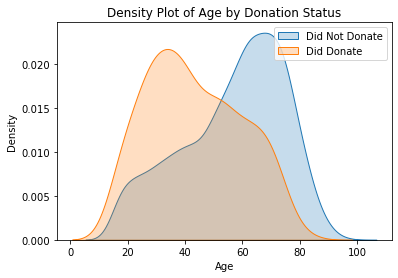

In [ ]:
# Density plot for those who did not donate
sns.kdeplot(data["age"][data["did_donate_account"] == "No"], label="Did Not Donate", fill=True)

# Density plot for those who did donate
sns.kdeplot(data["age"][data["did_donate_account"] == "Yes"], label="Did Donate", fill=True)

# Add titles and labels
plt.title("Density Plot of Age by Donation Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

*Add you answer here*

#### 3.20. Can you think of a reason for this difference between donated and not donated with respect to "Age"?

*Add you answer here*

#### 3.20. Is the distribution of level of education similar between the group that donated their WhatsApp data and the group who did not donate? If not, in what way are they different?

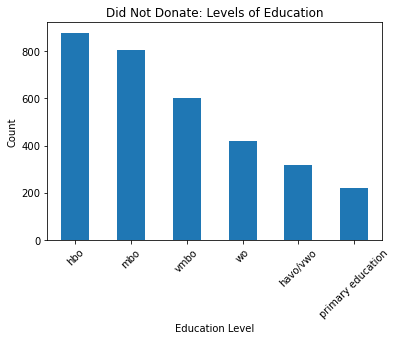

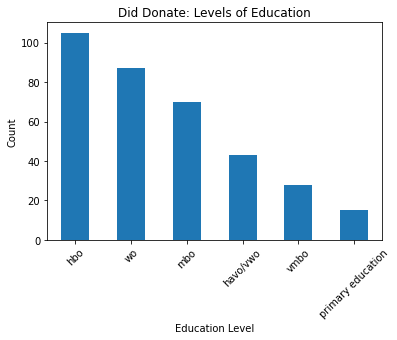

In [ ]:
# get education counts for individuals who did vs. did not donate
education_counts_nodon = data["education"][data["did_donate_account"] == "No"].value_counts()
education_counts_don = data["education"][data["did_donate_account"] == "Yes"].value_counts()

# Create Bar Plots for both
education_counts_nodon.plot(kind="bar")
plt.title("Did Not Donate: Levels of Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

education_counts_don.plot(kind="bar")
plt.title("Did Donate: Levels of Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

*Add you answer here*

#### 3.21. Can you think of a reason for this difference between donated and not donated with respect to "Education"?

*Add you answer here*

## Part 4: Measurement issues

We now also explore what measurement issues might be present in this dataset. We continue to follow the Total Survey Error Framework by Groves et al. (2009), and dive into specific issues related to data donation when relevant.

### Validity

We start on the top of the measurement side of the TE framework with “Validity”.

#### 4.1. What is validity?

*Add you answer here*

Now consider that we are interested in measuring social connectivity, we would like to understand how socially connected or embedded someone is within different communities, such as family, work, hobbies or their local environment. As an indicator for social connectivity, we use the number of WhatsApp group someone is a member of.

#### 4.2. How does what we want to measure differ from what we are actually measuring?

*Add you answer here*

### Measurement error

#### 4.3.  What is measurement error?

*Add you answer here*

#### 4.4. We can obtain the number of WhatsApp groups a person is a member of in two different ways. The first way is by asking this in a survey (self-report). The second way is by extracting this number through data donation of the WhatsApp account. What can be reasons why these two numbers differ? Which of the two do you consider to be more reliable when considering what we are interested in for this study.

*Add you answer here*


We now explore how the distribution of donated number of groups compares to the distribution of the self-reported number of groups

#### 4.5. How does the distribution of the donated number of groups differ from the self-reported number of groups?

count    2831.00000
mean       10.45461
std        17.44062
min         0.00000
25%         3.00000
50%         6.00000
75%        10.00000
max       400.00000
Name: groups_quest, dtype: float64


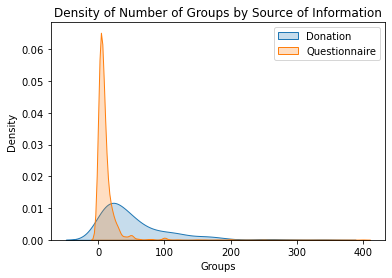

In [ ]:
print(data["groups_quest"].describe())

# Plot
sns.kdeplot(data["groups_don"], label = "Donation", fill = True)
sns.kdeplot(data["groups_quest"], label = "Questionnaire", fill = True)

# Add titles and labels
plt.title("Density of Number of Groups by Source of Information")
plt.xlabel("Groups")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

*Add you answer here*

If there were no differences between these two variables, they would have a correlation of 1.

#### 4.6. What is the correlation coefficient between these two variables?

0.5421788780261098


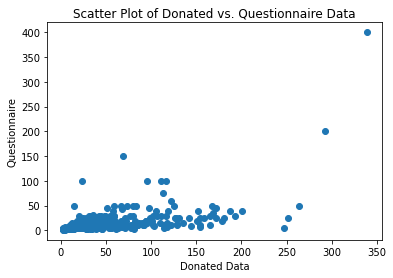

In [ ]:
# Correlation
correlation = data[["groups_don", "groups_quest"]].dropna().corr().iloc[0, 1]
print(correlation)

# Plot
plt.scatter(data["groups_don"], data["groups_quest"])
plt.xlabel("Donated Data")
plt.ylabel("Questionnaire")
plt.title("Scatter Plot of Donated vs. Questionnaire Data")
plt.show()

*Add you answer here*

#### 4.7. How would you interpret this correlation?

*Add you answer here*

### Processing error

#### 4.8. What is processing error?

*Add you answer here*

Consider the number of WhatsApp groups we obtained through data donation. Data donation in this study was performed using local processing, meaning that only the number of WhatsApp groups was already counted locally on the device of the participant, and the raw WhatsApp groups were never shared with LISS.

#### 4.9. What is the consequence of this local processing step when considering the processing error here?

*Add you answer here*

#### 4.10. What other forms of processing errors can you think of?

*Add you answer here*

## Part 5: Amplified asking

What we want to do now, is creating a model to predict the number of WhatsApp groups provided in the donated data using the survey variables as predictors. To do that,	we only take the part where we have observations for both the survey and the donations.

First of all, we need to subset the data to respondents who also donated their WhatsApp data, as we need observations with values in the dependent variable to estimate the model.

In [ ]:
# Subset data to people who donated
data_don = data[data['groups_don'].notna()]

Next, we estimate an OLS regression model to predict *groups_don*. We first only use the self-reported number of groups (i.e., *groups_quest*) as predictor which further illustrates the relationship between the two variables. Next, we include other survey variables, i.e. *sex*, *age*, *education* in the model as well.

In [ ]:
import statsmodels.formula.api as sm

# model only including self-reported groups
model_selfrep = sm.ols(formula="groups_don ~ groups_quest", data=data_don).fit()
print(model_selfrep.summary())

# model including other survey variables
model_full = sm.ols(formula="groups_don ~ sex + age + education + groups_quest", data=data_don).fit()
print(model_full.summary())


                            OLS Regression Results                            
Dep. Variable:             groups_don   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     128.7
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           3.66e-25
Time:                        13:47:38   Log-Likelihood:                -1619.5
No. Observations:                 311   AIC:                             3243.
Df Residuals:                     309   BIC:                             3251.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.9725      2.911     12.702   

#### 5.1. Looking at the model output, which of the two models should we continue with? Reason your decision with a statistic from the output.

*Add you answer here*

Next, we can look at how well the predicted values from the full model for people who donated match with the actual donated values. To do so, we plot them against each other below.

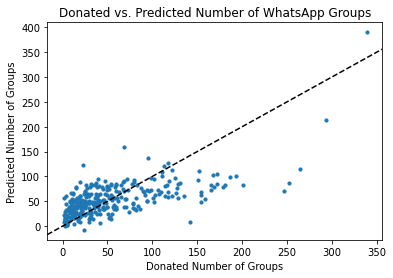

In [ ]:
# Scatter plot donated and predicted data
plt.scatter(data_don["groups_don"], model_full.predict(data_don), s=10)

# Add diagonal dashed line
plt.axline((0, 0), slope=1, color="black", linestyle="--")

# Add titles and labels
plt.xlabel("Donated Number of Groups")
plt.ylabel("Predicted Number of Groups")
plt.title("Donated vs. Predicted Number of WhatsApp Groups")

# Show the plot
plt.show()


Additionally we can again look at the densities

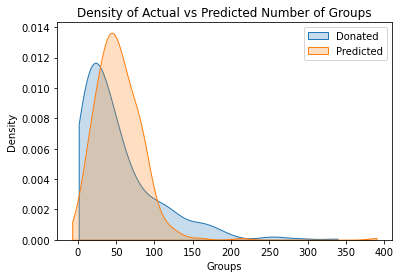

In [ ]:
# Plot densities
sns.kdeplot(data_don["groups_don"], label = "Donated", fill = True, cut=0)
sns.kdeplot(model_full.predict(data_don), label = "Predicted", fill = True, cut=0)

# Add titles and labels
plt.title("Density of Actual vs Predicted Number of Groups")
plt.xlabel("Groups")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()


#### 5.2. Inspecting the two plots above, what do you notice about the predicted values? Does the model predict the number of groups well?

*Add you answer here*

We can now run a cross-validation:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Only keep complete observations (listwise deletion)
X = data_don[["sex", "age", "education", "groups_quest"]].dropna()
y = data_don["groups_don"][X.index]

# Create label encoder for the categorical variables
le = LabelEncoder()

# Fit and transform the categorical variables
X["sex"] = le.fit_transform(X["sex"]) # convert sex to numeric values
X["education"] = le.fit_transform(X["education"]) # convert education to numeric values

# Estimate linear model
model = LinearRegression()

# Perform cross-validation
r2_scores = cross_val_score(model, X, y, cv=5, scoring= "r2")

# Retrieve r2 values per fold
print("R2 scores:", r2_scores)
print("Average R2 score:", r2_scores.mean())



R2 scores: [0.17839802 0.18656432 0.02879055 0.39972704 0.39857481]
Average R2 score: 0.23841094846299046


And then use the estimated model to predict the number of groups for participants who did not donate their Whatsapp groups.

In [ ]:
# Subset to people who have values for all survey variables & didn't donate
data_survey = data[data['groups_don'].isna() & data[['sex', 'age', 'education', 'groups_quest']].notna().all(axis=1)]

# Select predictor variables
X_new = data_survey[["sex", "age", "education", "groups_quest"]]

# Fit and transform the categorical variables
X_new["sex"] = le.fit_transform(X_new["sex"])
X_new["education"] = le.fit_transform(X_new["education"])

# Estimate linear model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X_new)

# Add predictions to the data_survey
data_survey['groups_don_pred'] = y_pred

print(data_survey.head())

  consent did_donate_account     sex  age education  groups_don  groups_quest  \
1      no                 No    male   60        wo         NaN           6.0   
3      no                 No  female   32       mbo         NaN           1.0   
5     yes                 No  female   39       mbo         NaN          10.0   
6      no                 No  female   69       mbo         NaN           2.0   
7      no                 No  female   48       mbo         NaN           4.0   

   groups_don_pred  
1        38.083152  
3        42.462145  
5        43.099031  
6         6.960046  
7        29.252777  


<ipython-input-24-071224680c1c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new["sex"] = le.fit_transform(X_new["sex"])
<ipython-input-24-071224680c1c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new["education"] = le.fit_transform(X_new["education"])
<ipython-input-24-071224680c1c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Lastly, we can compare the distribution of Whatsapp groups of the actual data from the donation and the predictions from our model:

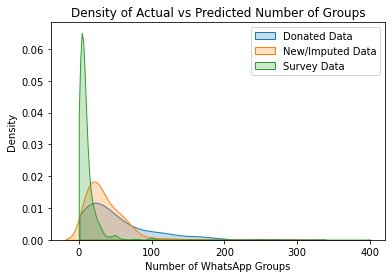

In [ ]:
# concatenate data_don["groups_don"] and data_survey['groups_don_pred']
data_all = pd.concat([data_don["groups_don"], data_survey['groups_don_pred']])

# density plot for actual donated values
sns.kdeplot(data_don["groups_don"], label="Donated Data", fill = True, cut=0)

# density plot for predicted donated values
sns.kdeplot(data_all, label="New/Imputed Data", fill = True, cut=0)

# density plot for the survey group
sns.kdeplot(data["groups_quest"], label="Survey Data", fill = True, cut=0)

# Add titles and labels
plt.title("Density of Actual vs Predicted Number of Groups")

plt.xlabel("Number of WhatsApp Groups")
plt.ylabel("Density")
plt.legend()
plt.show()


#### 5.3. Describe in your own words which steps we carried out in the pieces of code above.

*Add you answer here*

#### 5.4. How can we use this new predicted/imputed variable?

*Add you answer here*

#### 5.5. Compare the distribution of the number of groups from the survey group to the new group. How do they differ?

*Add you answer here*

#### 5.6. As we found out earlier, the average of the predicted values for "donated number of groups" is a bit lower compared to the average in the observed values for "donated number of groups". Consider the information that we incorporate in our prediction model here. What can be an explanation for this difference?

*Add you answer here*

#### 5.7. We now have a variable that contains both the "donated number of groups" as well as the "predicted donated number of groups" for the participants that did not donate. In what way can this variable lead to estimates of better quality (less error) compared to when only the "donated number of groups" was being used?

*Add you answer here*

#### 5.8. And in what way could using such a variable could lead to estimats of lower quality?

*Add you answer here*

## Part 6: Literature questions

#### 6.1. Read through [this](https://royalsocietypublishing.org/doi/pdf/10.1098/rsif.2015.0185) paper as well as Section 3.6.2 in the Bit by Bit book. What are the similarities between the study design of Toole et al. (2015) with that of Blumenstock et al. (2015)?

*Add you answer here*

#### 6.2. And what are the differences?

*Add you answer here*

#### 6.3. Do you think call records should replace traditional surveys, complement them, or not to be used at all for government policymakers to track unemployment. Why?

*Add you answer here*

#### 6.4. What evidence would convince you that call detail records can completely replace traditional survey measures of unemployment rate?

*Add you answer here*